**Aim:** Implement and demonstrate the working model of K-means clustering algorithm with Expectation Maximization Concept.

**Program:** Apply EM algorithm to cluster a set of data stored in a `.CSV` file. Use the same data set for clustering using K-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Python ML library classes/API in the program.

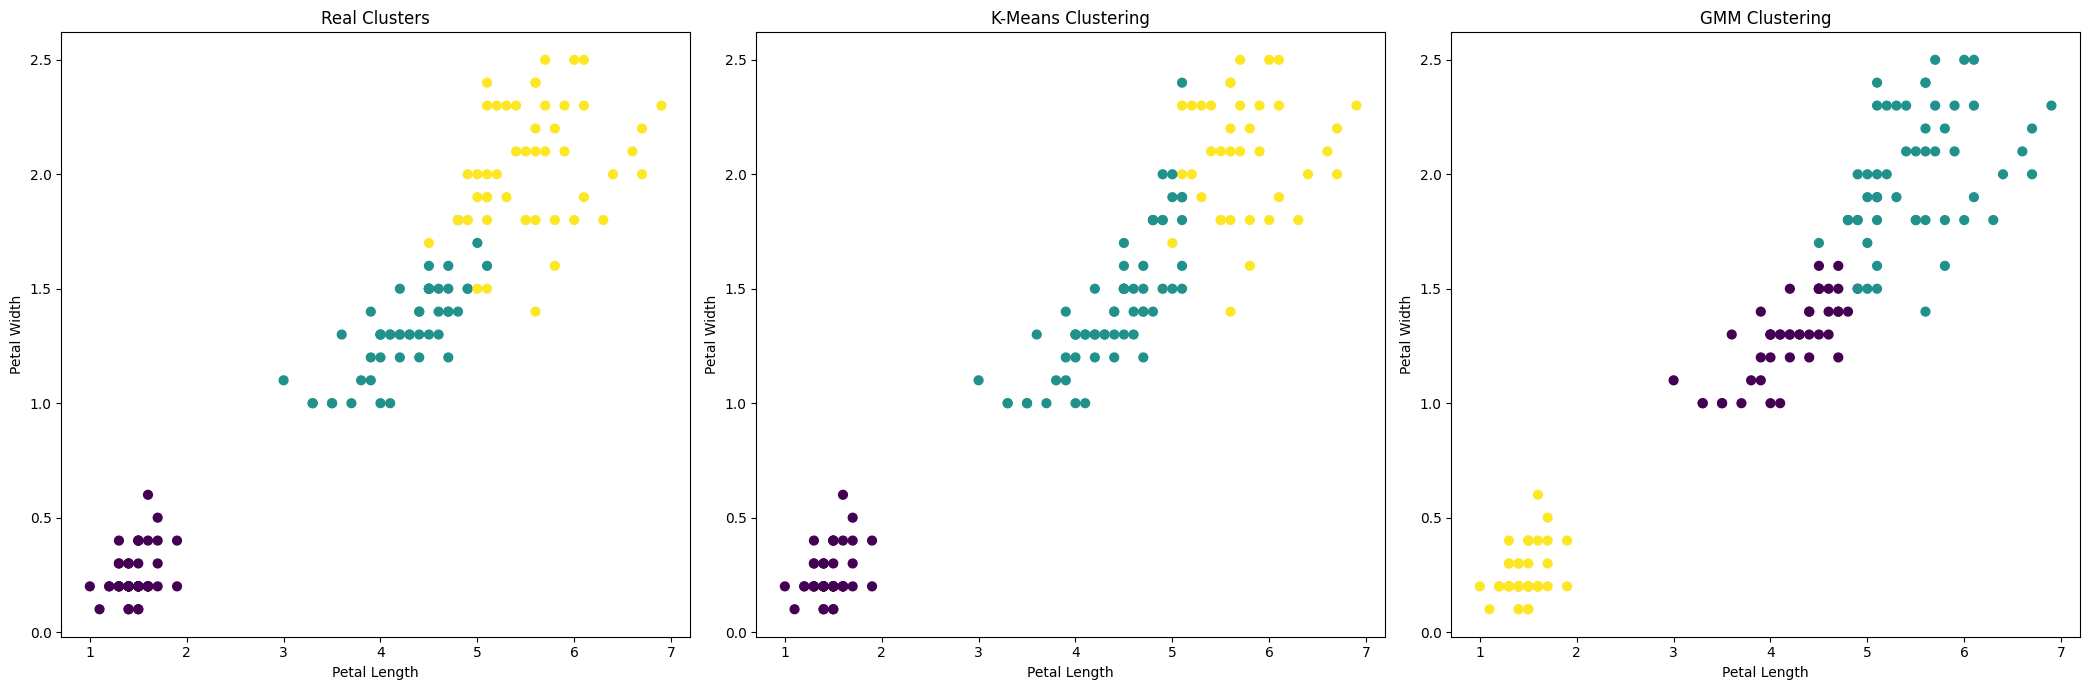

Kmeans accuracy:  0.8933333333333333
Kmeans Confusion Matrix:  [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
GMM accuracy:  0.03333333333333333
GMM Confusion Matrix:  [[ 0  0 50]
 [45  5  0]
 [ 0 50  0]]


In [5]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm

iris = load_iris()
X = pd.DataFrame(iris.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
y = pd.DataFrame(iris.target, columns=['Targets'])

plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=y['Targets'], cmap='viridis', s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

kmeans_model = KMeans(n_clusters=3, n_init=10)
kmeans_model.fit(X)
kmeans_labels = kmeans_model.labels_

plt.subplot(1, 3, 2)
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=kmeans_labels, cmap='viridis', s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

scaler = StandardScaler() 
scaler.fit(X)
X_scaled = scaler.transform(X)
gmm = GaussianMixture(n_components=3)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)

plt.subplot(1, 3, 3)
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=gmm_labels, cmap='viridis', s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()

print("Kmeans accuracy: ",sm.accuracy_score(y,kmeans_labels))
print("Kmeans Confusion Matrix: ",sm.confusion_matrix(y,kmeans_labels))
print("GMM accuracy: ",sm.accuracy_score(y,gmm_labels))
print("GMM Confusion Matrix: ",sm.confusion_matrix(y,gmm_labels))

### 1. What is the Iris dataset, and why is it commonly used in machine learning?

The **Iris dataset** is a classic dataset in machine learning, consisting of 150 samples of iris flowers with 4 features: sepal length, sepal width, petal length, and petal width. It is commonly used because it is small, easy to visualize, and includes a simple classification problem with three classes.

### 2. What is K-Means clustering, and how does it work?

**K-Means clustering** is an unsupervised learning algorithm that partitions data into K distinct clusters based on feature similarity. It works by initializing centroids and iteratively assigning data points to the nearest centroid, then updating the centroids until convergence.

### 3. Why is data scaling important before applying Gaussian Mixture Models (GMM)?

**Data scaling** is important for GMM because the algorithm assumes that the data follows a Gaussian distribution. If the features are not scaled, the model may give more importance to features with larger variance, leading to biased clustering results.

### 4. What is the difference between K-Means and GMM clustering?

**K-Means** assumes that clusters are spherical and equidistant from each other, assigning each point to the nearest cluster centroid. **GMM**, on the other hand, models the data as a mixture of multiple Gaussian distributions, allowing for more flexible cluster shapes and soft assignments (probabilistic).

### 5. What is a confusion matrix, and how is it used in evaluating clustering models?

A **confusion matrix** is a table used to describe the performance of a classification model by comparing predicted labels with true labels. In clustering, it helps evaluate how well the model's clusters correspond to actual classes.

### 6. Why might the accuracy of clustering be lower than expected, even if the clustering seems visually correct?

Clustering accuracy might be lower if the labels assigned by the algorithm don't directly correspond to the actual class labels, even though the data points are correctly grouped. This can happen because clustering labels are arbitrary and don't necessarily match the true class labels.

### 7. What are some limitations of using K-Means clustering?

**K-Means clustering** has several limitations, including sensitivity to the initial choice of centroids, difficulty in detecting non-spherical clusters, and requirement to pre-specify the number of clusters (K).
